IN THE NAME OF GOD

 <font color = '#0ccc43'> **Importing Libraries**</font>

In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

 <font color = '#0ccc43'> **Read Dataset**</font>

In [15]:
data = pd.read_csv('penguins_size.csv')
data.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


 <font color = '#0ccc43'> **Find Out Shape Of Data**</font>

In [16]:
print("shape of data:" ,data.shape)

shape of data: (344, 7)


The expression obtained above means that this collection has 344 rows and 7 columns. In other words, there are 344 observations, and each observation has 7 other characteristics.

 <font color = '#0ccc43'> **Dataset Info**</font>

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


We can observe in the above information that each float category column is missing 2 null observations while the sex column is missing 10 of them.

 <font color = '#0ccc43'> **Unique Species**</font>

In [18]:
print("Unique species:" , data['species'].unique())

Unique species: ['Adelie' 'Chinstrap' 'Gentoo']


We can understand from the above information that each penguin is from one of the three following species : Adelie , Chinstrap , Gentoo .

 <font color = '#0ccc43'> **Find NAN Values Per Columns**</font>

In [19]:
df = data.isnull().sum()
print("NAN values per column:" , df)

NAN values per column: species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In that code we can see all  the null values.These are  no good to any data and It is one of the most important parts of data preprocessing to be rid of them or have them treated accordingly.

 <font color = '#0ccc43'> **Culmen Depth In Each Island**</font>

In [20]:
culmen_depth_island = data.groupby('island')['culmen_depth_mm'].mean()
print("Culmen depth in each island:" ,culmen_depth_island  )

Culmen depth in each island: island
Biscoe       15.874850
Dream        18.344355
Torgersen    18.429412
Name: culmen_depth_mm, dtype: float64


This result shows the average depth of culman in millimeters for each island where penguins have been observed.This information provides insight into the variation in culmen depth among penguins on different islands, which can be useful for understanding the characteristics of penguin populations in those locations.

 <font color = '#0ccc43'> **Body Mass In Each Sex**</font>

In [21]:
body_mass_by_sex = data.groupby('sex')['body_mass_g'].mean()
print("Body mass in each sex:" ,body_mass_by_sex)

Body mass in each sex: sex
.         4875.000000
FEMALE    3862.272727
MALE      4545.684524
Name: body_mass_g, dtype: float64


This output  is a summary of the body mass of penguins based on their sex in the dataset. Here's a breakdown of the information:

- FEMALE: The average body mass of female penguins is approximately 3862.27 grams.
- MALE: The average body mass of male penguins is approximately 4545.68 grams.

 "4875.00" is not labeled, but it could possibly represent the overall average body mass across both sexes.

This information provides a clear comparison of the average body mass between male and female penguins.

 <font color = '#0ccc43'> **Species In Each Island**</font>

In [22]:
species_by_island = data.groupby('island')['species'].unique()
print("Species in each island:" , species_by_island)

Species in each island: island
Biscoe          [Adelie, Gentoo]
Dream        [Adelie, Chinstrap]
Torgersen               [Adelie]
Name: species, dtype: object


This output  shows the distribution of penguin species across different islands. Here's a breakdown of the information:

- Biscoe island is home to Adelie and Gentoo penguin species.
- Dream island is home to Adelie and Chinstrap penguin species.
- Torgersen island is home to Adelie penguin species.

This information provides a clear overview of the species distribution across different islands.

 <font color = '#0ccc43'> **Share Of Female Penguins In Each Species**</font>

In [23]:
share_female_by_species = data[data['sex'] == 'F']['species'].value_counts() / data['species'].value_counts()
print("Share of female penguins in each species:")
print(share_female_by_species)


Share of female penguins in each species:
species
Adelie      NaN
Chinstrap   NaN
Gentoo      NaN
Name: count, dtype: float64


This output  indicates that there is no available data for the share of female penguins in each species. The "NaN" values suggest that the information is missing or not present in the dataset.

 <font color = '#0ccc43'> **Flipper Length Comparisons Between Species(min,max,mean)**</font>

In [24]:
flipper_length_comparisons = data.groupby('species')['flipper_length_mm'].agg(['min','max','mean'])
print("Flipper length comparisons between species:" , flipper_length_comparisons)

Flipper length comparisons between species:              min    max        mean
species                            
Adelie     172.0  210.0  189.953642
Chinstrap  178.0  212.0  195.823529
Gentoo     203.0  231.0  217.186992


- Adelie penguins have a minimum flipper length of 172.0, a maximum of 210.0, and a mean of 189.95.
- Chinstrap penguins have a minimum flipper length of 178.0, a maximum of 212.0, and a mean of 195.82.
- Gentoo penguins have a minimum flipper length of 203.0, a maximum of 231.0, and a mean of 217.19.

This data shows the range and average flipper lengths for each penguin species, providing insight into the differences between them.

 <font color = '#0ccc43'> **Finding the relationship between body mass and beak depth of penguins**</font>

Text(0.5, 1.0, 'correlation_pearson = -0.4730')

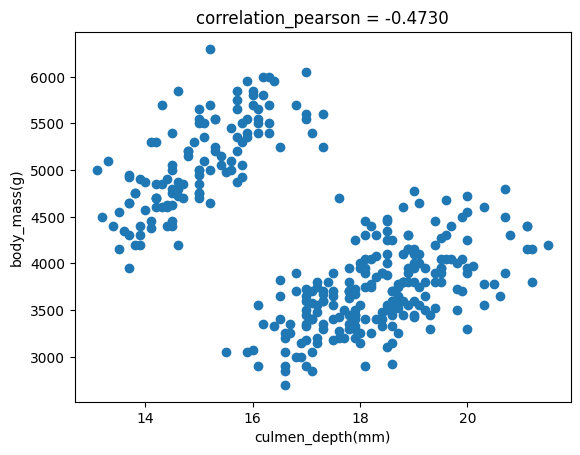

In [30]:
data = data.dropna()
plt.figure()
plt.scatter(data['culmen_depth_mm'] , data['body_mass_g'] )
plt.xlabel('culmen_depth(mm)')
plt.ylabel('body_mass(g)')
correlation = np.corrcoef(data['culmen_depth_mm'],data['body_mass_g'])[0,1]
plt.title('relationship between body mass & culmen depth of penguins')
plt.title(f'correlation_pearson = {correlation: .4f}')

Here we wanted to investigate the relationship between these two variables. For this purpose, we drew a graph using these two variables and calculated their correlation coefficient. As we know, the correlation coefficient is between -1 and 1, and the more it moves to the negative side, the more independent the variables are. It has no effect and as a result two variables are independent of each other as much as -0.47.

 <font color = '#0ccc43'> **Average culmen length for each species**</font>

In [31]:

average_culmen_length_by_species = data.groupby('species')['culmen_depth_mm'].mean()
print("Average culmen length for each species:",average_culmen_length_by_species )



Average culmen length for each species: species
Adelie       18.347260
Chinstrap    18.420588
Gentoo       15.002500
Name: culmen_depth_mm, dtype: float64


The average culmen length for each penguin species is calculated. This provides the mean culmen length for each species, giving insight into the typical culmen length for different species of penguins.

 <font color = '#0ccc43'> **Range of flipper length for each species**</font>

In [32]:

flipper_length_range_by_species = data.groupby('species')['flipper_length_mm'].agg(lambda x: x.max() - x.min())
print("Range of flipper length for each species:" ,flipper_length_range_by_species )



Range of flipper length for each species: species
Adelie       38.0
Chinstrap    34.0
Gentoo       28.0
Name: flipper_length_mm, dtype: float64


The range of flipper length for each penguin species is determined. This provides the difference between the maximum and minimum flipper length observed within each species, offering insights into the variability of flipper length within different penguin species.

From the given information, we can observe that Adelie penguins have the largest range of flipper lengths (38.0 mm), indicating that there is a wider variation in flipper length within this species. On the other hand, Chinstrap penguins have a slightly smaller range (34.0 mm), suggesting a slightly narrower overall variability in flipper length. Gentoo penguins exhibit the smallest range (28.0 mm), indicating the least variability in flipper length within this species.